# Thursday: Models

In [1]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F

## building the model class

In [260]:
# building the class 

class model(nn.Module):
    
    def __init__(self, in_features = 3, h1 = 3, h2 = 3, out = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out)
    
    def forward(self, x):
        x = x.flatten().reshape(-1,784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
    


In [261]:
net = model(784, 256, 256, 10)

## loading MNIST data set

In [10]:
import pandas as pd 
import numpy as pd 
import PIL 
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


In [11]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (np.array(x_train), np.array(y_train)),(np.array(x_test), np.array(y_test))

In [38]:
import os 

downloads = os.path.expanduser("~/Downloads/MNIST/")
training_images_filepath = join(downloads, "train-images-idx3-ubyte")
training_labels_filepath = join(downloads, "train-labels-idx1-ubyte")
test_images_filepath = join(downloads, "t10k-images-idx3-ubyte")
test_labels_filepath = join(downloads, "t10k-labels-idx1-ubyte")

files = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)

In [39]:
(x_train, y_train), (x_test, y_test) = files.load_data()

In [249]:
# flatten the images and prepare them to be passed to the model 
X = []
conv_img = transforms.ToTensor()
for img in x_train:
    img_flatten = conv_img(img)
    X.append(img_flatten)

In [250]:
X = torch.stack(X)

In [253]:
Y = torch.LongTensor(y_train)

In [255]:
net.parameters

<bound method Module.parameters of model(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
)>

In [319]:
X.shape

torch.Size([60000, 1, 28, 28])

In [354]:
crit = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), lr = 0.005)

In [355]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    net.to(device)

In [356]:
# train the model 

epochs = 1000
losses = []
xt = X[:60000,].to(device)
yt = Y[:60000].to(device)
for i in range(epochs):
    yhat = net.forward(xt)
    loss = crit(yhat, yt)
    # store the loss
    losses.append(loss.detach().cpu().numpy())

    # back propagation 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    

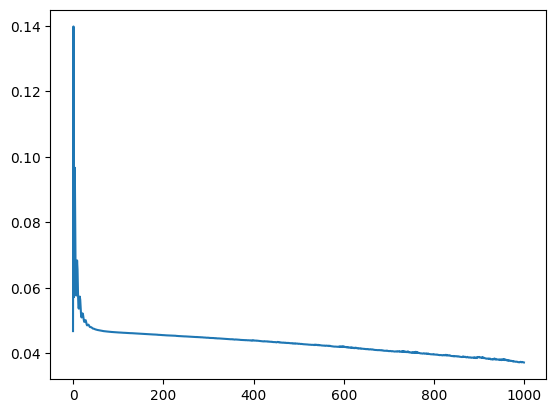

In [357]:
plt.plot(losses)

In [358]:
X_test.shape

torch.Size([10000, 28, 28])

In [40]:
# prepare test data 

X_test = torch.FloatTensor(x_test).unsqueeze(1).cuda()
Y_test = torch.LongTensor(y_test).cuda()

In [360]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_eval = net.forward(data)
        pred = y_eval.argmax().item()
       
        if pred == Y_test[i]:
           correct +=1 
        else:
             print(f"{i}). \t{pred}\t{Y_test[i]}")


8). 	6	5
16). 	7	9
18). 	8	3
20). 	4	9
22). 	2	6
52). 	0	5
61). 	2	8
62). 	1	9
63). 	2	3
66). 	2	6
73). 	7	9
78). 	1	9
95). 	8	4
99). 	7	9
104). 	1	9
105). 	1	9
113). 	7	9
115). 	1	4
118). 	7	9
119). 	8	2
125). 	7	9
139). 	2	4
149). 	4	2
151). 	1	9
155). 	8	5
159). 	1	4
166). 	7	4
175). 	1	7
185). 	7	9
187). 	3	5
211). 	0	5
214). 	4	9
220). 	9	7
233). 	7	8
235). 	2	9
241). 	8	9
245). 	2	3
250). 	9	4
259). 	9	6
273). 	7	9
274). 	7	9
277). 	1	8
281). 	7	9
284). 	8	9
290). 	1	8
300). 	2	4
315). 	1	9
320). 	7	9
336). 	7	9
340). 	3	5
341). 	4	6
347). 	8	5
352). 	0	5
359). 	4	9
360). 	2	4
364). 	8	5
367). 	1	5
372). 	8	0
381). 	7	3
399). 	5	4
400). 	8	2
404). 	7	2
406). 	0	5
412). 	3	5
425). 	7	4
428). 	8	4
435). 	7	8
445). 	0	6
448). 	8	9
454). 	7	9
460). 	1	5
468). 	9	7
469). 	3	5
478). 	8	5
479). 	3	9
495). 	2	8
501). 	1	9
502). 	1	5
509). 	3	5
530). 	1	9
540). 	1	5
542). 	1	8
558). 	1	9
560). 	7	9
562). 	7	9
565). 	9	4
582). 	3	8
591). 	3	8
596). 	1	8
599). 	7	9
610). 	2	4
627). 	1	9
628

In [362]:
correct

8652

In [366]:
8652/10_000 *100

86.52

In [363]:
loss

tensor(0.0372, device='cuda:0', grad_fn=<NllLossBackward0>)

## creating a data loader 

In [ ]:
from torch.utils import dataset, 
class MnistDataClass():
    def __init__(self, )

## Convolutional Neural Network

* multiply element wise a kernel with an image/tensor and sum it up
    * the draggin of the kernel over the image is called convolution
    * the weigths in the kernel are tuned over the epochs
* When using large image files a fully connected network will be to computationally taxing for image files
    * imagine an image file of X amount of megapixels e.g. a 200 mb picture shot with a nikon
    * The convolutional layers are not fully but locally connected
    * an image is often split into the three RGB channels that make up the image 
 
parts of a CNN:
* convolution: the proces of dragging a kernel over the image outputs a smaller matrix
* pooling: the proces of selecting the most important values and creating a new layer
    * reducing the data into a smaller matrix and feed this to the next layer 
        * max pooling: take the highest value
        * average pooling: take the average
* flattened layer before the fully connected layers
  
* big image &rarr; smaller image &rarr; complexity reduced

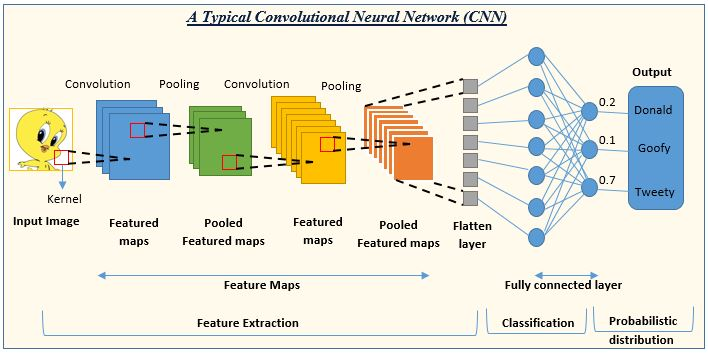

In [52]:
class conv_mnist(nn.Module):
    def __init__(self, n_pix = 1):
        super().__init__()
        self.conv1 = nn.Conv2d(n_pix, 6, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(16*5*5, 256)
        self.fc2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return F.log_softmax(x, dim =1)
        

In [53]:
mnist = conv_mnist(1).cuda()

In [54]:
mnist

conv_mnist(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=256, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)

In [35]:
conv_optim = torch.optim.Adam(mnist.parameters(), lr = 0.01)
crit = nn.CrossEntropyLoss()

In [25]:
x_train.shape

(60000, 28, 28)

In [41]:
# prepare the data 
transform = transforms.ToTensor()

x_train, x_test = [transform(x).unsqueeze(1).cuda() for x in (x_train, x_test)]
y_train, y_test = [torch.LongTensor(y).cuda() for y in (y_train, y_test)]


In [55]:
import time 

start_time = time.time()
X, Y = x_train, y_train 
epochs = 1
batch_size = 128
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for epoch in range(epochs):
    trn_corr = 0 
    tst_corr = 0

    permutation = torch.randperm(X.size()[1])
    
    
    for i in range(0, X.size()[1], batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X[:,indices,:], Y[indices]
        
        y_hat = mnist.forward(batch_x)
        loss = crit(y_hat, batch_y)
        
        predicted = torch.max(y_hat, 1)[1]
        batch_corr = (predicted == batch_y).sum()

        trn_corr += batch_corr

        conv_optim.zero_grad()
        loss.backward()
        conv_optim.step()

        if i % 3000 == 0:
            s = f"Epoch: {epoch}\tBatch: {i}\tLoss: {loss.item()}"
            print(s)
        



end_time = time.time()

total_time = end_time - start_time 
print(f"elapsed time: {total_time} minutes")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x1199840 and 400x256)

In [29]:
  permutation = torch.randperm(x_train.size()[1])

In [32]:
permutation

tensor([46661, 28716, 42401,  ..., 49265, 38412, 32625])

In [57]:
x_train.shape

torch.Size([28, 1, 60000, 28])

In [ ]:
60_000 * 